
Choose from the options below: 
 1. Compare two movies 
 2. Comment on the Blog

1
Enter the name of 1st movie: spectre
1 : Spectre (2015) 
2 : The Boogey Man (1980) 
3 : Spectre (1977) (TV) 
4 : Spectre (in development) (????) 
5 : Spectre (2009) 
6 : Spectre (2013) 
7 : Spectre (2008) 
8 : Spectre (2007) 
9 : Spectre (2012) 
10 : The Spectre (2010) (V) 
11 : Spectral (2016) 
12 : The Usual Suspects (1995) 
13 : Spectres (2004) 
14 : Out 1: Spectre (1974) 
15 : Spectres (2012) 
16 : The Spectacular Now (2013) 
17 : InSpectres (2013) 
18 : The Red Spectre (1907) 
19 : "Spectreman" (1971) 
20 : Rogue Spectre (2015) 
Select the index
1
Enter facebook name of the 1st movie:SpectreMovie
Enter the name of 2nd movie: Green Lantern
1 : Green Lantern (2011) 
2 : "Just Seen It" Green Lantern (2011) 
3 : "Honest Trailers" Green Lantern (2014) 
4 : Green Lantern Corps (2020) 
5 : The Green Lantern (2010) 
6 : "Behind the Scenes (I)" Green Lantern (I) (2011) 
7 : "Vern Fonk Vision" Green Lantern 

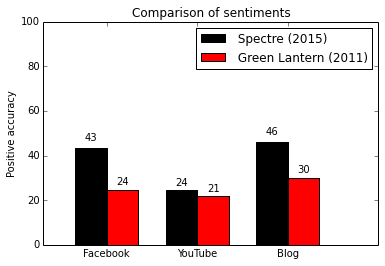

10000000
(<matplotlib.patches.Rectangle object at 0x1110cda10>,)
(<matplotlib.patches.Rectangle object at 0x1110cd9d0>,)


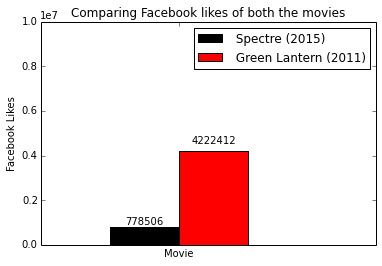

1
(<matplotlib.patches.Rectangle object at 0x110ced4d0>,)
(<matplotlib.patches.Rectangle object at 0x110ced2d0>,)


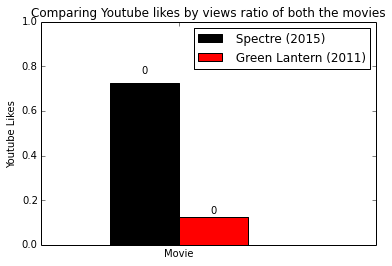

give it another try!!

Choose from the options below: 
 1. Compare two movies 
 2. Comment on the Blog



KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
from apiclient.errors import HttpError
from apiclient.discovery import build
from oauth2client.tools import argparser
from gdata import youtube as yt
from gdata.youtube import service as yts
from argparse import Namespace
#from new_classifier_project import *
import re
import facebook
#from new_classifier_project import *
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import hashlib
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from statistics import mode
import os
from sklearn.metrics import accuracy_score
import pickle
import ConfigParser
from sklearn.metrics import accuracy_score
import copy
import nltk
import imdb
import MySQLdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



def connection():
    conn = MySQLdb.connect(host="localhost",user = "root",passwd = "<password>",db = "movie")
    conn.set_character_set('utf8')
    c = conn.cursor()
    c.execute('SET NAMES utf8;')
    c.execute('SET CHARACTER SET utf8;')
    c.execute('SET character_set_connection=utf8;')
    return c, conn


############################imdb######################################

def main_function_imdb(movie_name):
    m = imdb.IMDb()
    #title = raw_input("Enter the movie name :")
    results = m.search_movie(movie_name)

    i = 1
    for movie in results:
        #print movie.movieID
        print "%s : %s " % (i,movie['long imdb title'])
        i += 1

    print "Select the index"
    j = int(raw_input())
    movie_id = results[j-1].movieID
    movie1 = m.get_movie(movie_id)
    sum_dict = {}
    sum_list = []
    sum_list = movie1.summary().split('\n')
    #print movie1.summary()
    del sum_list[0:2]
    #print sum_list
    for summ in sum_list:
        l = summ.split(":")
        sum_dict[l[0]] = l[1]
    sum_dict['movie ID'] = movie_id
    return sum_dict


############################################################################


############################Clasiifier######################################


def tokenize_with_punct(text):
    
    tokens = []
    t = []
    text = text.lower()
    tokens = re.findall(r"[\w]+[\W]", text)
    for token in tokens:
        if token != " ":
            t.append(token)
            
        
    return t


def tokenize_with_not(text):
    
    tokens = tokenize_with_punct(text)
    len1 = len(tokens)
    for i in range(len1):
        
        if tokens[i] == 'not':
            
            if i+1<len1:
                tokens[i+1] = 'not_%s' % (tokens[i+1])
            if i+2<len1:
                tokens[i+2] = 'not_%s' % (tokens[i+2])
            
    return tokens

def do_vectorize(data,tokenizer_fn = tokenize_with_not,min_df = 1,max_df = 1.0,binary =True,ngram_range = (1,1)):
    
    vec = CountVectorizer(tokenizer=tokenizer_fn,max_df=max_df, min_df=min_df,binary=binary, ngram_range=ngram_range)
    X = vec.fit_transform(data)
    return (X, vec)




def logisticsRegreesion(X,y,T):
    clf_logisticsRegression = LogisticRegression()
    clf_logisticsRegression.fit(X,y)
    prediction_logisticsRegression = clf_logisticsRegression.predict(T)
    return prediction_logisticsRegression.tolist()


def multinomialNB(X,y,T):
    clf_multinomialNB =  MultinomialNB()
    clf_multinomialNB.fit(X,y)
    prediction_multinomialNB = clf_multinomialNB.predict(T)
    return prediction_multinomialNB.tolist()

def bernoulliNB(X,y,T):
    clf_bernoulliNB =  BernoulliNB()
    clf_bernoulliNB.fit(X,y)
    prediction_bernoulliNB = clf_bernoulliNB.predict(T)
    return prediction_bernoulliNB.tolist()

def linearSVC(X,y,T):
    clf_linearSVC =  LinearSVC()
    clf_linearSVC.fit(X,y)
    prediction_linearSVC = clf_linearSVC.predict(T)
    return prediction_linearSVC.tolist()

def SGDC_classifier(X,y,T):
    clf_SGDC_classifier = SGDClassifier()
    clf_SGDC_classifier.fit(X,y)
    prediction_SGDC_classifier = clf_SGDC_classifier.predict(T)
    return prediction_SGDC_classifier.tolist()

    
def main_function(all_test_data,X,vec_train,y):
    
    
    
    all_test_data1 = []
    for i in range(len(all_test_data)):
        m = re.search(r"http",all_test_data[i])
        if not m:
            all_test_data1.append(all_test_data[i])
         
    all_test_data2 = []
    
    myre = re.compile(u'('
            u'\ud83c[\udf00-\udfff]|'
            u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
            u'[\u2600-\u26FF\u2700-\u27BF])+', 
            re.UNICODE)
    
    
    for text in all_test_data1:
        text1 = myre.sub('',text)
        all_test_data2.append(text1)
    
   
    T  = vec_train.transform(all_test_data2)
    prediction_logisticsRegression = logisticsRegreesion(X,y,T)
    prediction_multinomialNB = multinomialNB(X,y,T)
    prediction_bernoulliNB = bernoulliNB(X,y,T)
    prediction_linearSVC = linearSVC(X,y,T)
    prediction_SGDC_classifier = SGDC_classifier(X,y,T)
    
    no_of_reviews = len(all_test_data2)
    
    
    
    prediction = []

    for i in range(no_of_reviews):
        p = []
        p =[prediction_logisticsRegression[i],prediction_multinomialNB[i],prediction_bernoulliNB[i],prediction_linearSVC[i],prediction_SGDC_classifier[i]]
        
        prediction.append(mode(p))
    #print zip(all_test_data1, prediction)
    return prediction
    
#all_test_data = ["great movie nice cast awesome expirience","bad movie bad cast worst expirience"]
#print main_function(all_test_data)



############################################################################







###########################youtube code###################################



def youtube_object():
    
    DEVELOPER_KEY = "<youtube_key>"
    YOUTUBE_API_SERVICE_NAME = "youtube"
    YOUTUBE_API_VERSION = "v3"

    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
        developerKey=DEVELOPER_KEY)

    return youtube

def get_comment_threads(youtube, video_id):
    results = youtube.commentThreads().list(
    part="snippet",
    videoId=video_id,
    textFormat="plainText"
  ).execute()

    text_list = []
    for item in results["items"]:
        comment = item["snippet"]["topLevelComment"]
        author = comment["snippet"]["authorDisplayName"]
        text = comment["snippet"]["textDisplay"]
        
        text_list.append(text)
    return text_list

def youtube_likes(youtube,video_id):
        result_stats = youtube.videos().list(id=video_id,part='id,statistics').execute()
        return result_stats
        
def youtube_search(options,youtube,X,vec_train,y):
    

    # Call the search.list method to retrieve results matching the specified
    # query term.
    search_response = youtube.search().list(q=options.q,part="id,snippet",maxResults=options.max_results).execute()
    videos = []
    video_id = []
    all_test_file = []
    pos_likes = 0
    neg_likes = 0
    youtube_views = 0
    

    # Add each result to the appropriate list, and then display the lists of
    # matching videos, channels, and playlists.
    
    for search_result in search_response.get("items", []):
        if search_result["id"]["kind"] == "youtube#video":
            videos.append("%s (%s)" % (search_result["snippet"]["title"],search_result["id"]["videoId"]))
            a=  search_result["id"]["videoId"]
            
            text_list = get_comment_threads(youtube,a)
            states = youtube_likes(youtube,a)
            
            
            pos_likes += int(states['items'][0]['statistics']['likeCount'])
            neg_likes += int(states['items'][0]['statistics']['dislikeCount'])
            youtube_views += int(states['items'][0]['statistics']['viewCount'])

            all_test_file.extend(text_list)
            
            video_id.append(a)
    
    
    return prediction_comments(all_test_file,pos_likes,neg_likes,youtube_views,X,vec_train,y)
    
def prediction_comments(all_test_file,pos_likes,neg_likes,youtube_views,X,vec_train,y):
    prediction = main_function(all_test_file,X,vec_train,y)
    pos_comments = 0
    neg_comments = 0
    for i in prediction:
        if i == 1:
            pos_comments += 1
        elif i == 0:
            neg_comments += 1
    return (pos_likes,neg_likes,youtube_views,pos_comments,neg_comments)
    
def main_function_youtube(movie_name,youtube,X,vec_train,y):
    args = Namespace(q=movie_name, max_results=5)
    data = youtube_search(args,youtube,X,vec_train,y)
    return data


#########################################################################################



######################################facebook Code#######################################################


def facebook_object():
    access_token = '<facebook_key>'
    fb = facebook.GraphAPI(access_token)
    return fb




def main_function_facebook(movie_name,fb,X,vec_train,y):
    
 
    profile = fb.get_object(movie_name)
    id1 = (profile['id'])
    likes = profile['likes']
    post = fb.get_connections(id1,'posts')
    all_test_data = []
    for i in range(len(post['data'])):
        for j in range(len(post['data'][i]['comments']['data'])):
                      all_test_data.append(post['data'][i]['comments']['data'][j]['message'])
    #print len(all_test_data)



    prediction = (main_function(all_test_data,X,vec_train,y))
    #print prediction


    pos = 0
    neg = 0
    for i in prediction:
        if i == 1:
            pos +=1
        elif i ==0:
            neg +=1

    #print "positive:%s" % pos
    #print "negative:%s" % neg
    #print "number of likes: %s" % (likes)
    
    return (likes,pos,neg)
#print main_function_facebook("MadMaxMovie")



##########################################################################################################

####################################main fuction######################################################################

def main_calling_function(movie_name,movie_fb_name,summary):
    
    
    blog_review = []
    youtube = youtube_object()
    fb = facebook_object()
    c,conn = connection()
    
    
    dic = {}

    documents_f = open("all_train_data.pickle", "rb")
    all_train_data = pickle.load(documents_f)
    documents_f.close()
    
    documents_I = open("lables.pickle", "rb")
    y = pickle.load(documents_I)
    documents_I.close()
    
    movie_id = summary['movie ID']
    
    c.execute("select * from blog_data where movie_id = %s",[movie_id])
    
    i = c.fetchall()
    
    conn.close()
    
    for j in i:
        blog_review.append(j[2])
    
    
    
    X,vec_train = do_vectorize(all_train_data,tokenizer_fn = tokenize_with_not,min_df = 1,max_df = 1.0,binary =True,ngram_range = (1,1))
    (likes_yt,disliskes_yt,youtube_views,pos_comments_yt,neg_comments_yt) = main_function_youtube(summary['Title'],youtube,X,vec_train,y)
    (likes_fb,pos_comments_fb,neg_comments_fb) = main_function_facebook(movie_fb_name,fb,X,vec_train,y)
    prediction_blog = main_function(blog_review,X,vec_train,y)
    
    pos_blog = 0
    neg_blog = 0
    for i in prediction_blog:
        if i == 1:
            pos_blog +=1
        elif i ==0:
            neg_blog +=1
    
    
    dic['youtube likes'] = likes_yt
    dic['youtube_dislikes'] = disliskes_yt
    dic['no. of positive comments in youtube'] = pos_comments_yt
    dic['no. of negative comments in youtube'] = neg_comments_yt
    dic['no. of views in youtube'] = youtube_views   
    dic['Facebook likes'] = likes_fb
    dic['no. of positive comments in facebook'] = pos_comments_fb
    dic['no. of negative comments in facebook'] = neg_comments_fb
    dic['no. of positive comments in blog'] = pos_blog
    dic['no. of negative comments in blog'] = neg_blog
    
    return (dic)
    

    


##########################################################################################################
def main():
    
    movie_name1 = raw_input("Enter the name of 1st movie: ")
    summary_movie1 = main_function_imdb(movie_name1)
    movie_fb_name1 = raw_input("Enter facebook name of the 1st movie:")
    movie_name2 = raw_input("Enter the name of 2nd movie: ")
    summary_movie2 = main_function_imdb(movie_name2)
    movie_fb_name2 = raw_input("Enter facebook name of the 2nd movie:")
    dic_movie1 = main_calling_function(movie_name1,movie_fb_name1,summary_movie1)
    dic_movie2 = main_calling_function(movie_name2,movie_fb_name2,summary_movie2)
    
    return (dic_movie1,dic_movie2,summary_movie1,summary_movie2)


def graph(mname1,mname2,mv_p_fb1,mv_n_fb1,mv_p_fb2,mv_n_fb2,
          mv_p_y1,mv_n_y1,mv_p_y2,mv_n_y2,
          mv_p_blog1,mv_n_blog1,mv_p_blog2,
          mv_n_blog2,title,y_axis):
    
    mv_fb1 = []
    mv_fb2 = []
    
    fb_1_score =   100 * (mv_p_fb1 / float((mv_p_fb1 + mv_n_fb1)))
    mv_fb1.append(fb_1_score)
    fb_2_score =  100 * (mv_p_fb2 / float((mv_p_fb2 + mv_n_fb2)))
    mv_fb2.append(fb_2_score)
    y_1_score =  100 *(mv_p_y1 / float((mv_p_y1 + mv_n_y1)))
    mv_fb1.append(y_1_score)
    y_2_score =  100 *(mv_p_y2 / float((mv_p_y2 + mv_n_y2)))
    mv_fb2.append(y_2_score)
    blog_1_score =  100 *(mv_p_blog1 / float((mv_p_blog1 + mv_n_blog1)))
    mv_fb1.append(blog_1_score)
    blog_2_score =  100 *(mv_p_blog2 / float((mv_p_blog2 + mv_n_blog2)))
    mv_fb2.append(blog_2_score)
    
    #fig = plt.figure()
    ax = plt.subplot(111)

    ## the data
    N = 3
    
    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars

    ## the bars
    rects1 = ax.bar(ind, mv_fb1, width,
                    color='black',
                    error_kw=dict(elinewidt=2,ecolor='red'))

    rects2 = ax.bar(ind+width, mv_fb2, width,
                        color='red',
                        error_kw=dict(elinewidth=2,ecolor='blue'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    y_max = 100
    
    ax.set_ylim(0,y_max)
    ax.set_ylabel(y_axis)
    ax.set_title(title)
    xTickMarks = ['Facebook','YouTube','Blog']
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    ## add a legend
    ax.legend( (rects1[0], rects2[0]), (mname1, mname2))
    
    def assign_values(rects):
        for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                        '%d' % int(height),
                        ha='center', va='bottom')

    assign_values(rects1)
    assign_values(rects2)



    
    plt.show()

    
def graph1(mv_fb1,mv_fb2,title,y_axis,mname1,mname2):
    #fig = plt.figure()
    ax = plt.subplot(111)
    
    

    ## the data
    N = 1

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars

    ## the bars
    rects1 = ax.bar(ind, 1. *mv_fb1, width,
                    color='black',
                    error_kw=dict(elinewidt=2,ecolor='red'))

    rects2 = ax.bar(ind+width, 1. *mv_fb2, width,
                        color='red',
                        error_kw=dict(elinewidth=2,ecolor='black'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    
    if max(mv_fb1,mv_fb2) < 1:
        y_max = 1
    else:
        y_max = len(str(max(mv_fb1,mv_fb2)))
        y_max = (10 ** (y_max))
    
    print y_max
    ax.set_ylim(0,y_max)
    ax.set_ylabel(y_axis)
    ax.set_title(title)
    xTickMarks = ['Movie' for i in range(1,2)]
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    ## add a legend
    print rects1[:]
    print rects2[:]
    ax.legend( (rects1[0], rects2[0]), (mname1, mname2))
    #ax2.legend( (rects1[0], rects2[0]), ('Movie1', 'Movie2'))
    def assign_values(rects):
        for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                        '%d' % float(height),
                        ha='center', va='bottom')

    assign_values(rects1)
    assign_values(rects2)



    
    plt.show()    
    
    
def choice():
    print "\nChoose from the options below: \n 1. Compare two movies \n 2. Comment on the Blog\n"
    choice1 = int(raw_input())

    if choice1 == 1:
        a,b,sum1,sum2 = main()


        graph(mname1 = sum1['Title'],
              mname2 = sum2['Title'],
              mv_p_fb1=a['no. of positive comments in facebook'],
              mv_n_fb1=a['no. of negative comments in facebook'],
              mv_p_fb2=b['no. of positive comments in facebook'],
              mv_n_fb2=b['no. of negative comments in facebook'],
              mv_p_y1=a['no. of positive comments in youtube'],
              mv_n_y1=a['no. of negative comments in youtube'],
              mv_p_y2=b['no. of positive comments in youtube'],
              mv_n_y2=b['no. of negative comments in youtube'],
              mv_p_blog1=a['no. of positive comments in blog'],
              mv_n_blog1=a['no. of negative comments in blog'],
              mv_p_blog2=b['no. of positive comments in blog'],
              mv_n_blog2=b['no. of negative comments in blog'],
              title="Comparison of sentiments",
              y_axis="Positive accuracy")


        graph1(mv_fb1=a['Facebook likes'],mv_fb2=b['Facebook likes'],title ="Comparing Facebook likes of both the movies",y_axis = "Facebook Likes",mname1=sum1['Title'],mname2=sum2['Title'])

        graph1(mv_fb1=(1. *a['youtube likes']/a['no. of views in youtube']*100),mv_fb2=(1. *b['youtube likes']/b['no. of views in youtube']*100),title ="Comparing Youtube likes by views ratio of both the movies",y_axis = "Youtube Likes/views ratio",mname1=sum1['Title'],mname2=sum2['Title'])
        
        print "give it another try!!"
        choice()
        
    elif choice1 == 2:
        
        movie_name = raw_input("Enter the name of movie: ")
        summary = main_function_imdb(movie_name)
        
        comment = raw_input("Enter you review here:")
        
        c,conn = connection()
        
        c.execute("insert into blog_data (movie_id, title, review) values (%s, %s, %s)",(summary['movie ID'],summary['Title'],comment))
        conn.commit()
        conn.close()
        
        print "Thank you for your review!!!!!!"
        choice()


choice()
        
